In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [5]:
# load data and modules
import pandas as pd
from tensorflow.keras.utils import to_categorical

df = pd.read_csv(path_data+'df_ch03.csv', dtype={'label':'category'})
df.head()

,text,label
0,From: b711zbr@utarlg.uta.edu (JUNYAN WANG)\nSu...,alt.atheism
1,From: yamauchi@ces.cwru.edu (Brian Yamauchi)\n...,sci.space
2,From: rolfe@dsuvax.dsu.edu (Tim Rolfe)\nSubjec...,soc.religion.christian
3,"From: MUNIZB%RWTMS2.decnet@rockwell.com (""RWTM...",sci.space
4,From: davem@bnr.ca (Dave Mielke)\nSubject: Doe...,soc.religion.christian


In [6]:
# exercise 01

"""
Prepare label vectors

In the video exercise, you learned the differences between binary classification and multi-class classification. You learned that there are some modifications to the data preparation process that need to be done before training the models.

In this exercise, you will prepare a raw dataset with labels given as text. The data is given as a pandas.DataFrame called df, with two columns: text with the text data and label with the label names. Your task is to make all the necessary transformations to the labels: change string to number and one-hot encode.

The module pandas as pd and the function to_categorical() from keras.utils.np_utils are already loaded in the environment and the first lines of the dataset is printed on the console for you to see.
"""

# Instructions

"""

    Get the attribute .cat.codes of the column label contained on data frame df and print its shape.
---

    One-hot encode the vector using the to_categorical() function and store the results in Y while printing the new shape.
---

    Print the first 5 rows of the variable Y.

"""

# solution

# Get the numerical ids of column label
numerical_ids = df.label.cat.codes

# Print initial shape
print(numerical_ids.shape)

# One-hot encode the indexes
Y = to_categorical(numerical_ids)

# Check the new shape of the variable
print(Y.shape)

# Print the first 5 rows
print(Y[:5])

#----------------------------------#

# Conclusion

"""
With this approach, you are able to transform any dataset to the format needed by RNN models. You can try with a dataset of your liking. Also, you can see that each class is now equidistant and the loss function will treat every misclassification in the same way, allowing for a better learning phase. To train RNN models, it is necessary to transform the text representation of the classes to a numeric one-hot vector.
"""

(1672,)
(1672, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


'\nWith this approach, you are able to transform any dataset to the format needed by RNN models. You can try with a dataset of your liking. Also, you can see that each class is now equidistant and the loss function will treat every misclassification in the same way, allowing for a better learning phase. To train RNN models, it is necessary to transform the text representation of the classes to a numeric one-hot vector.\n'

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences


news_dataset = pd.read_csv(path_data+'news_dataset.csv')
news_dataset.head()

,data,target
0,From: herzog@dogwalk.Eng.Sun.COM (Brian Herzog...,5
1,From: waldo@cybernet.cse.fau.edu (Todd J. Dick...,17
2,From: rcs8@po.CWRU.Edu (Robert C. Sprecher)\nS...,4
3,From: 18084TM@msu.edu (Tom)\nSubject: Space Cl...,14
4,From: bigjoe@netcom.com (g perry)\nSubject: 19...,6


In [10]:
# exercise 02

"""
Pre-process data

You learned the differences for pre-processing the data in the case of multi-class classification. Let's put that into practice by preprocessing the data in anticipation of creating a simple multi-class classification model.

The dataset is loaded in the variable news_dataset, and has the following attributes:

    news_dataset.data: array with texts
    news_dataset.target: array with target categories as numerical indexes

The sample data contains 5,000 observations.
"""

# Instructions

"""

    Instantiate the Tokenizer class on the tokenizer variable.
    Fit the tokenizer variable on the text data.
    Use the .texts_to_sequences() method on the text data.
    Use the to_categorical() function to prepare the target indexes.

"""

# solution

# Create and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_dataset.data)

# Prepare the data
prep_data = tokenizer.texts_to_sequences(news_dataset.data)
prep_data = pad_sequences(prep_data, maxlen=200)

# Prepare the labels
prep_labels = to_categorical(news_dataset.target)

# Print the shapes
print(prep_data.shape)
print(prep_labels.shape)

#----------------------------------#

# Conclusion

"""
Great! This is how one can prepare the text data and the labels before using a RNN model for multi-class classification. You can see that all the documents with different lenghts are now with exactly the same shape, also, the labels are one-hot encoded and ready to be used on a RNN model.
"""

(5000, 200)
(5000, 20)


'\nGreat! This is how one can prepare the text data and the labels before using a RNN model for multi-class classification. You can see that all the documents with different lenghts are now with exactly the same shape, also, the labels are one-hot encoded and ready to be used on a RNN model.\n'

In [11]:
# Data for plotting

history_no_emb = {'val_loss': [1.4070982545315749, 0.8381293654504675], 'val_acc': [0.4169741699302203, 0.6910911970032977], 'loss': [1.5740309341759702, 0.9943260273792968], 'acc': [0.3011921458625526, 0.641304347658893]}

history_emb = {'val_loss': [0.9943465825187953, 0.8769925933922349], 'val_acc': [0.6172904589330767, 0.6547179761282318], 'loss': [1.3484232113037002, 0.9192634542560176], 'acc': [0.429523141404188, 0.6567321179792557]}

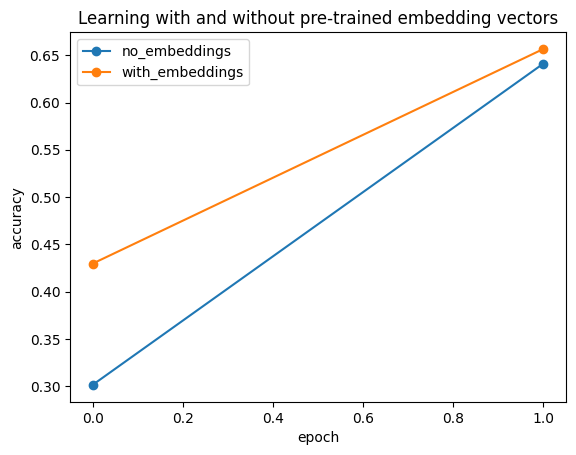

'\nTransfer learning provides a initial knowledge of the meaning of the words, and you can see that the model that used pre-trained embeddings started with higher accuracy. Of course, the model without transfer learning is learning directly from the corpus and is more specialized on the vocabulary present in the corpus, while the word embeddings used from transfer learning are more generic. By training the embeddings directly on the corpus, the model can be even better than the one initialized with the weights from transfer learning, but in many cases the computer power to train embeddings in a very big dataset is prohibitive.\n'

In [12]:
# exercise 03

"""
Transfer learning starting point

In this exercise you will see the benefit of using pre-trained vectors as a starting point for your model.

You will compare the accuracy of two models trained with two epochs. The architecture of the models is the same: One embedding layer, one LSTM layer with 128 units and the output layer with 5 units which is the number of classes in the sample data. The difference is that one model uses pre-trained vectors on the embedding layer (transfer learning) and the other doesn't.

The pre-trained vectors used were the GloVE with 200 dimension. The training accuracy history of the validation set of both models are available in the variables history_no_emb and history_emb.
"""

# Instructions

"""

    Import module matplotlib.pyplot as plt.
    Add the list of accuracy from the model without embeddings to the plot.
    Add the list of accuracy from the model with embeddings to the plot.
    Display the plot using the method .show().

"""

# solution

# Import plotting package
import matplotlib.pyplot as plt

# Insert lists of accuracy obtained on the validation set
plt.plot(history_no_emb['acc'], marker='o')
plt.plot(history_emb['acc'], marker='o')

# Add extra descriptions to plot
plt.title('Learning with and without pre-trained embedding vectors')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['no_embeddings', 'with_embeddings'], loc='upper left')

# Display the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Transfer learning provides a initial knowledge of the meaning of the words, and you can see that the model that used pre-trained embeddings started with higher accuracy. Of course, the model without transfer learning is learning directly from the corpus and is more specialized on the vocabulary present in the corpus, while the word embeddings used from transfer learning are more generic. By training the embeddings directly on the corpus, the model can be even better than the one initialized with the weights from transfer learning, but in many cases the computer power to train embeddings in a very big dataset is prohibitive.
"""

In [3]:
# exercise 04

"""
Word2Vec

In this exercise you will create a Word2Vec model using Keras.

The corpus used to pre-train the model is the script of all episodes of the The Big Bang Theory TV show, divided sentence by sentence. It is available in the variable bigbang.

The text on the corpus was transformed to lower case and all words were tokenized. The result is stored in the tokenized_corpus variable.

A Word2Vec model was pre-trained using a window size of 10 words for context (5 before and 5 after the center word), words with less than 3 occurrences were removed and the skip gram model method was used with 50 dimension. The model is saved on the file bigbang_word2vec.model.

The class Word2Vec is already loaded in the environment from gensim.models.word2vec.
"""

# Instructions

"""

    Load the pre-trained Word2Vec model.
    Store a list with the words "bazinga", "penny", "universe", "spock", "brain" in the variable words_of_interest, keeping them in that order.
    Iterate over each word of interest while using the .most_similar() method present on attribute wv and append the top 5 similar words to top5_similar_words as a dictionary.
    Print the found top 5 words for each of the words of interest.

"""

# solution

# Word2Vec model
w2v_model = Word2Vec.load('bigbang_word2vec.model')

# Selected words to check similarities
words_of_interest = ["bazinga", "penny", "universe", "spock", "brain"]

# Compute top 5 similar words for each of the words of interest
top5_similar_words = []
for word in words_of_interest:
    top5_similar_words.append(
      {word: [item[0] for item in w2v_model.wv.most_similar([word], topn=5)]}
    )

# Print the similar words
print(top5_similar_words)

#----------------------------------#

# Conclusion

"""
Cool, you can see that the similar words make quite sense in the big bang universe! You can also try to get similar words for other words using the function w2v_model.wv.most_similar(word, topn=5).
"""

'\n\n'

In [13]:
# Load Data and instanciate Tokenizer
from sklearn.datasets import fetch_20newsgroups

news_train = fetch_20newsgroups(subset='train')
news_test = fetch_20newsgroups(subset='test')

tokenizer = Tokenizer()

In [14]:
# exercise 05

"""
Exploring 20 News Groups dataset

In this exercise, you will be given a sample of the 20 News Groups dataset obtained using the fetch_20newsgroups() function from sklearn.datasets, filtering only three classes: sci.space, alt.atheism and soc.religion.christian.

The dataset is loaded in the variable news_dataset. Its attributes are printed so you can explore them on the console.

Fore more details on how to use this function, see the Sklearn documentation.(https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)

You will tokenize the texts and one-hot encode the labels step by step to understand how the transformations happen.
"""

# Instructions

"""

    Print the example article with index 5 from news_dataset.data.
---

    Transform the data into a sequence of numerical indexes.
---

    Print the transformed example (index 5) article.
---

    Transform the labels into one-hot vectors using the function to_categorical() and print the original text label and the transformed one-hot vector at index 5 to see the transformed example.

"""

# solution

# See example article
print(news_train.data[5])

# Transform the text into numerical indexes
news_num_indices = tokenizer.texts_to_sequences(news_train.data)

# Print the transformed example article
print(news_num_indices[5])

# Transform the labels into one-hot encoded vectors
labels_onehot = to_categorical(news_train.target)

# Check before and after for the sample article
print("Before: {0}\nAfter: {1}".format(news_train.target[5], labels_onehot[5]))

#----------------------------------#

# Conclusion

"""
This dataset is useful for experimenting on a multiclass classification model. The steps performed for pre-processing the data are the same for every text dataset in this format.
"""

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

'\nThis dataset is useful for experimenting on a multiclass classification model. The steps performed for pre-processing the data are the same for every text dataset in this format.\n'

In [17]:
# exercise 06

"""
Classifying news articles

In this exercise you will create a multi-class classification model.

The dataset is already loaded in the environment as news_novel. Also, all the pre-processing of the training data is already done and tokenizer is also available in the environment.

A RNN model was pre-trained with the following architecture: use the Embedding layer, one LSTM layer and the output Dense layer expecting three classes: sci.space, alt.atheism, and soc.religion.christian. The weights of this trained model are available on the classify_news_weights.h5 file.

You will pre-process the novel data and evaluate on a new dataset news_novel.
"""

# Instructions

"""

    Transform the data present on news_novel.data using the loaded tokenizer.
    Pad the obtained sequences of numerical indexes.
    Transform the labels present on news_novel.target into a one-hot representation.
    Evaluate the model using the method .evaluate() and print the loss and accuracy obtained.

"""

# solution

"""# Change text for numerical ids and pad
X_novel = tokenizer.texts_to_sequences(news_novel.data)
X_novel = pad_sequences(X_novel, maxlen=400)

# One-hot encode the labels
Y_novel = to_categorical(news_novel.target)

# Load the model pre-trained weights
model.load_weights('classify_news_weights.h5')

# Evaluate the model on the new dataset
loss, acc = model.evaluate(X_novel, Y_novel, batch_size=64)

# Print the loss and accuracy obtained
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss, acc))
"""

print("""    Loss:	1.2505866884313437
    Accuracy:	0.8397839665412903""")
#----------------------------------#

# Conclusion

"""
You can see that it can take some time to train one epoch of a RNN model. Also, you can modify the model architecture to add or change layers, the more layers the model has, the more time it need to train all the parameters.
"""

    Loss:	1.2505866884313437
    Accuracy:	0.8397839665412903


'\nYou can see that it can take some time to train one epoch of a RNN model. Also, you can modify the model architecture to add or change layers, the more layers the model has, the more time it need to train all the parameters.\n'

In [6]:
# exercise 07

"""
Precision-Recall trade-off

When working with classification tasks, the term Precision-Recall trade-off often appears. Where does it comes from?

Usually, the class with higher probability is chosen to assign the document to. But, what if the maximum probability is equal to 0.1? Should you consider that document to belong to this class with only 10% probability?

The answer varies according to problem at hand. It is possible to add a minimum threshold to accept the classification, and by changing the threshold the values of precision and recall move in opposite directions.

The variables y_true and the model model are loaded. Also, if the probability is lower than the threshold, the document will be assigned to DEFAULT_CLASS (chosen to be class 2).
"""

# Instructions

"""

    Use the .predict() method to get the probabilities for each class and store them in the pred_probabilities variable.
    Accept the maximum probability only if it is greater than or equal to 0.5 and store the results in the y_pred_50 variable.
    Use the np.argmax() and np.max() functions to do the same for a threshold equal to 0.8.
    Print the trade_off variable with all the metrics.

"""

# solution

# Get probabilities for each class
pred_probabilities = model.predict(X_test)

# Thresholds at 0.5 and 0.8
y_pred_50 = [np.argmax(x) if np.max(x) >= 0.5 else DEFAULT_CLASS for x in pred_probabilities]
y_pred_80 = [np.argmax(x) if np.max(x) >= 0.8 else DEFAULT_CLASS for x in pred_probabilities]

trade_off = pd.DataFrame({
    'Precision_50': precision_score(y_true, y_pred_50, average=None), 
    'Precision_80': precision_score(y_true, y_pred_80, average=None), 
    'Recall_50': recall_score(y_true, y_pred_50, average=None), 
    'Recall_80': recall_score(y_true, y_pred_80, average=None)}, 
  index=['Class 1', 'Class 2', 'Class 3'])

print(trade_off)

#----------------------------------#

# Conclusion

"""
You can see that for some classes precision increased and recall decresed, and the opposite also can happen. When one metric increases, the other has to decrease. The trade-off depends on the specific problem you are solving. If missclassification is not desirable for the class of interest, then you should change the threshold to increase the precision. Likewise, if misclassification is acceptable and you are interested in covering all the observations of a specific class, then you should tune the threshold for higher recall values.
"""

'\n\n'

In [ ]:
# exercise 08

"""
Precision or Recall, that is the question

You learned about a few performance metrics and maybe you are asking, when should I use precision and when should I use recall? Those two metrics are calculated for each class, and sometimes it is difficult to understand when to focus on one and when to focus on the other.

Precision is a metric that measures how well the model is predicting some class, while recall measures how well a class is being classified. If precision is high for one class, you can trust your model when it predicts that class. When recall is high for a class, you can rest assured that that class is well understood by the model.

Follow the instruction to see this comparison between precision and recall with an example. The functions precision_score() and recall_score() are loaded.
"""

# Instructions

"""

    Compute the precision of the sentiment_model using the sentiment_y_true and sentiment_y_pred variables and store it in the prec_sentiment variable.
    Print the obtained value.
---

    Compute the recall of the sentiment_model using the sentiment_y_true and sentiment_y_pred variables and store on the rec_sentiment variable.
    Print the obtained value.
---
Question

You are a manager at a bank responsible for social media analysis with the task to reduce the bad image your bank has obtained recently because the organization was not identifying its customers' complaints and needs. You implemented a sentiment analysis model to classify tweets mentioning the bank's name into good (compliments) or bad (complaints).

Imagine the results from the previous steps are the precision and recall measures of the class complaints (check the second item on the precision and recall arrays), which of the following is correct:

(Don't forget that you can use the console to check the values obtained before.)
[You want a higher recall score to identify most of the customers' complaints instead of a higher precision so you can rely on what the model predicted.]
"""

# solution

# Compute the precision of the sentiment model
prec_sentiment = precision_score(sentiment_y_true, sentiment_y_pred, average=None)
print(prec_sentiment)

#----------------------------------#

# Compute the recall of the sentiment model
rec_sentiment = recall_score(sentiment_y_true, sentiment_y_pred, average=None)
print(rec_sentiment)

#----------------------------------#

# Conclusion

"""
That's right! By identifying the complaints and needs of the bank's customers, you will be able to design campaings to engage with the clients and improve the image of the bank.
"""

In [19]:
# exercise 09

"""
Performance on multi-class classification

In this exercise, you will compute the performance metrics for models using the module sklearn.metrics.

The model is already trained and stored in the variable model. Also, the variables X_test and y_true are also loaded, together with the functions confusion_matrix() and classification_report() from sklearn.metrics package.

You will first compute the confusion matrix of the model. Then, to summarize a model's performance, you will compute the precision, recall and F1-score using the classification_report() function. In this function, you can optionally pass a list containing the classes names (they are stored it in the news_cat variable) to the parameter target_names to make the report more readable.
"""

# Instructions

"""

    Make the predictions on the X_test and store it in predicted.
    Get the class predicted with the higher probability using np.argmax(axis=1) and stored it in y_pred.
---

    Compute the confusion matrix using the function confusion_matrix().
---

    Print the classification_report() to see the formatted report.

"""

# solution

"""# Use the model to predict on new data
predicted = model.predict(X_test)

# Choose the class with higher probability 
y_pred = np.argmax(predicted, axis=1)

# Compute and print the confusion matrix
print(confusion_matrix(y_true, y_pred))

# Create the performance report
print(classification_report(y_true, y_pred, target_names=news_cat))"""

print("""<script.py> output:
    [[146  55 118]
     [ 19 353  22]
     [ 37  29 332]]
                            precision    recall  f1-score   support
    
                 sci.space       0.72      0.46      0.56       319
               alt.atheism       0.81      0.90      0.85       394
    soc.religion.christian       0.70      0.83      0.76       398
    
                  accuracy                           0.75      1111
                 macro avg       0.74      0.73      0.72      1111
              weighted avg       0.75      0.75      0.74      1111
    """)

#----------------------------------#

# Conclusion

"""
Thats great! You can have all the metrics in a single function call. It is an easy and fast way to evaluate the model performance in classification tasks. Also, remember that precision measures how good the predictions of the model are, meaning that high precision on one class makes the predictions the model make on that class to be reliable. In the other hand, recall measures how good the model is to predict each class, meaning that if you are interested in predicting a specific class and need high coverage on the number of true cases, you want high recall values.
"""

<script.py> output:
    [[146  55 118]
     [ 19 353  22]
     [ 37  29 332]]
                            precision    recall  f1-score   support
    
                 sci.space       0.72      0.46      0.56       319
               alt.atheism       0.81      0.90      0.85       394
    soc.religion.christian       0.70      0.83      0.76       398
    
                  accuracy                           0.75      1111
                 macro avg       0.74      0.73      0.72      1111
              weighted avg       0.75      0.75      0.74      1111
    


'\nThats great! You can have all the metrics in a single function call. It is an easy and fast way to evaluate the model performance in classification tasks. Also, remember that precision measures how good the predictions of the model are, meaning that high precision on one class makes the predictions the model make on that class to be reliable. In the other hand, recall measures how good the model is to predict each class, meaning that if you are interested in predicting a specific class and need high coverage on the number of true cases, you want high recall values.\n'